> # <b><font color = "Green">Jamboree Education - Linear Regression</font> </b>

---

  
>>**Analyst**: SYED ZAHEER ABBAS

>>**Email**: [syedzaheer.c@gmail.com](mailto:syedzaheer.c@email.com)  

>>**LinkedIn**: [SYED ZAHEER ABBAS ](https://www.linkedin.com/in/syed-z-59386a195/)  

## <span style="color:green">Table of Contents</span>

1. <span style="color:green">Business Problem</span>  
2. <span style="color:green">Objective</span>  
3. <span style="color:green">Concepts Used</span>  
4. <span style="color:green">Setting Up the Libraries</span>  
5. <span style="color:green">Data Loading</span>  
6. <span style="color:green">Basic EDA and Non-Graphical Analysis</span>  
7. <span style="color:green">Univariate Analysis</span>  
8. <span style="color:green">Bivariate Analysis</span>  
9. <span style="color:green">Multivariate Analysis</span>  
10. <span style="color:green">Applying Linear Regression</span>  
11. <span style="color:green">Linear Regression using Statsmodels</span>  
12. <span style="color:green">Assumptions of Linear Regression</span>  
13. <span style="color:green">Linear Regression using Ridge and Lasso</span>  
14. <span style="color:green">Insights and Recommendations</span>



#Business Problem

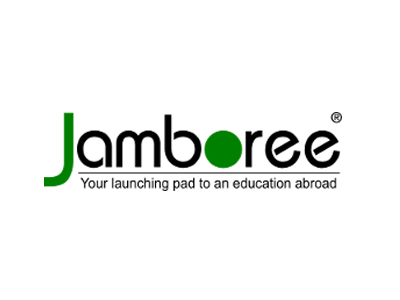

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

#Objective
The objective of this data analysis project is to build a predictive model that can accurately estimate the probability of graduate admission to Ivy League colleges for Indian students. By understanding the key factors influencing admission, the company seeks to help students make informed decisions and optimize their application strategies

#Concept Used


 - EDA ( Exploratory Data Analysis)
 -  Linear Regression


#Setting up the Libraraies and loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
import warnings

import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('Jamboree_Admission.csv',index_col=False)

#Basic EDA and Non- Graphical Analysis

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Observations**
-  There are 500 rows and 9 columns in the dataset
-  There are no categorical columns in the datset


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Serial No.',axis=1, inplace= True)

In [ ]:
df.rename({'LOR ':'LOR','Chance of Admit ': 'Chance of Admit'},axis=1,inplace= True)

### **Observations**
1. **No Null Values:**
 - The dataset does not contain any null (missing) values.

2. **Small Data Range:**
 - From the statistical summary, the range of data values appears to be narrow, reducing the likelihood of outliers. For instance:

 - GRE Score: 290–340 (narrow spread)
 - TOEFL Score: 92–120
 - CGPA: 6.8–9.92
 - This suggests that data values are relatively consistent.
3. **No Duplicate Rows:**
 - The dataset has been checked, and there are no duplicate rows present.

4. **Column Names Cleaned:**
 - Basic cleaning has been performed, such as removing extra spaces in the column names for consistency and usability.

# Univarient Analysis

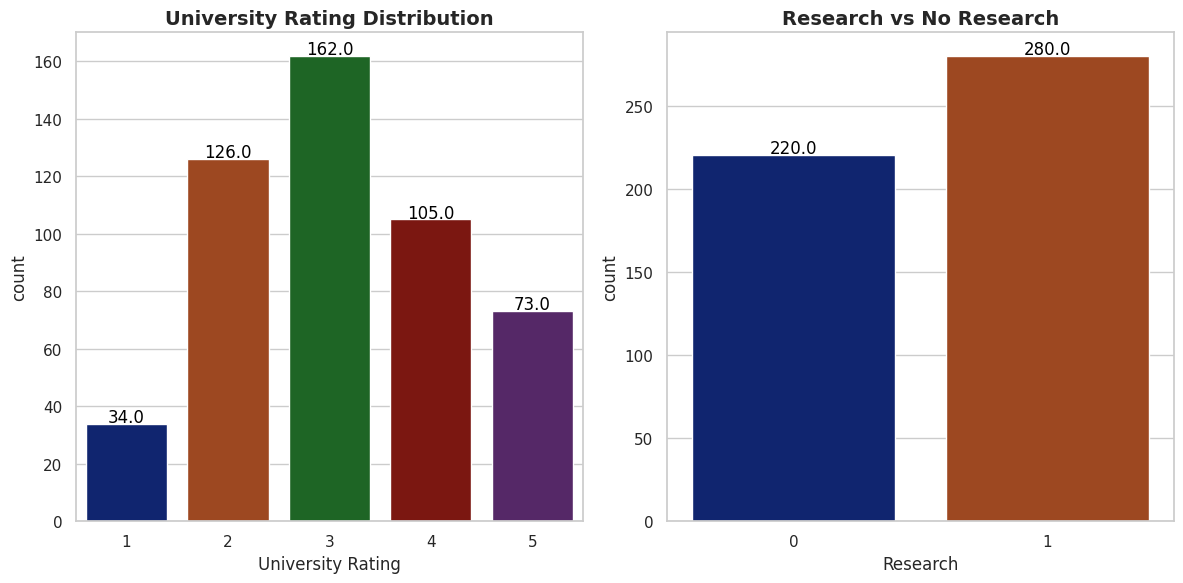

In [ ]:
palette=('Paired')
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

palette=sns.color_palette('dark')
sns.countplot(data=df,x='University Rating', ax=axes[0],palette=palette)
sns.countplot(data=df,x='Research', ax=axes[1],palette=palette)

axes[0].set_title('University Rating Distribution', fontsize=14, fontweight='bold')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].set_title('Research vs No Research', fontsize=14, fontweight='bold')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

###Insights
**University Rating Distribution**
- Based on the countplot, the majority of the data points are concentrated around University Ratings 2, 3, and 4.

**Research Experience:**
- The countplot indicates that 56% of individuals have research experience (Research = 1). This observation raises an interesting question
 - Does having research experience increase the Chance of Admit?
Further analysis (such as comparing averages, visualizations like boxplots, or statistical tests) will help determine its impact.

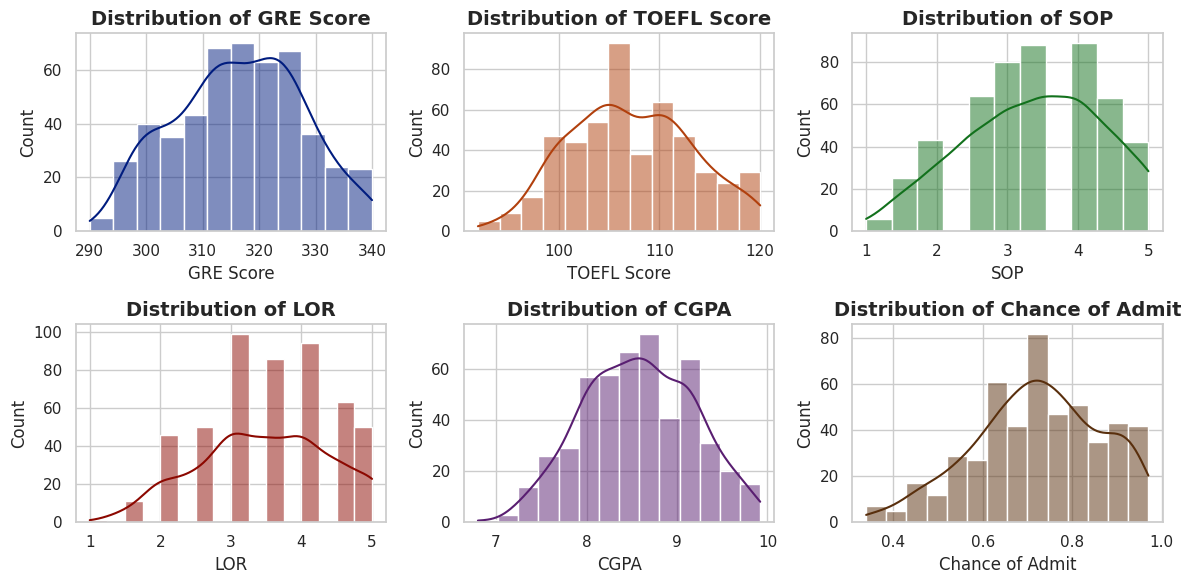

In [ ]:
col=['GRE Score','TOEFL Score','SOP','LOR','CGPA','Chance of Admit']
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,6))
axes = axes.flatten()
for i,c in enumerate(col):
  sns.histplot(data=df,x=c,ax=axes[i],kde= True, color=palette[i])
  axes[i].set_title(f"Distribution of {c}",fontsize=14, fontweight='bold')

plt.tight_layout()

###Observation
**Numerical Columns Distribution:**
 - Most of the numerical columns, such as **GRE Score, TOEFL Score, CGPA, LOE,SOP** and **Chance of Admit**, appear to follow a normal distribution, as evidenced by their symmetrical mean and standard deviation values. This makes these columns well-suited for further statistical analysis.



#BI VARIENT ANALYSIS

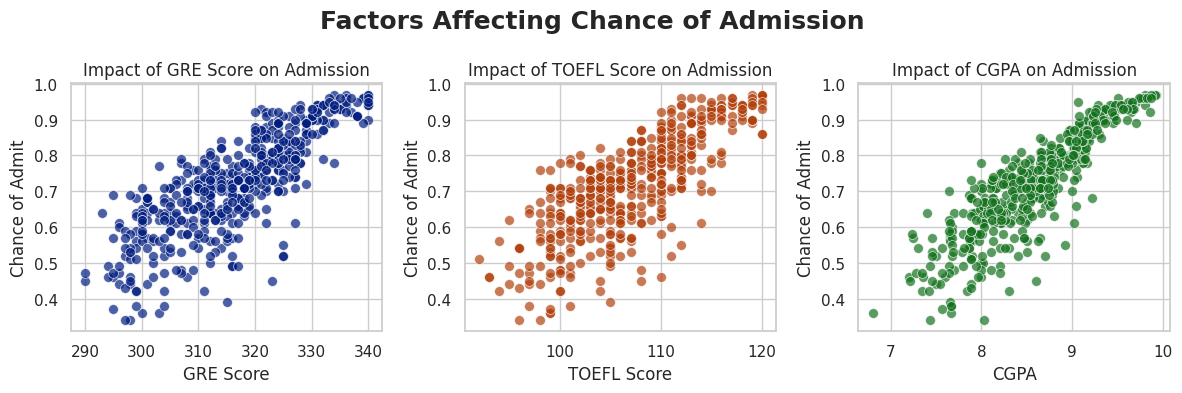

In [ ]:
col=['GRE Score','TOEFL Score','CGPA']
sns.set_theme(style="whitegrid")
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
axes=axes.flatten()
for i,j in enumerate(col):
  sns.scatterplot(data=df,x=j,y='Chance of Admit',ax=axes[i],color=palette[i], alpha=0.7, s=50)
  axes[i].set_title(f"Impact of {j} on Admission", fontsize=12)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Factors Affecting Chance of Admission', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()



###Observation
- There is a clear **positive correlation** between **GRE Score** and the **Chance of Admit**, as seen in the scatter plot. This indicates that students with higher GRE Scores generally have a higher chance of being admitted.

- There is a clear **positive correlation** between **TOEFL Score** and the **Chance of Admit**, as seen in the scatter plot. This indicates that students with higher GRE Scores generally have a higher chance of being admitted.


- There is a clear **positive correlation** between **CGPA** and the **Chance of Admit**, as seen in the scatter plot. This indicates that students with higher GRE Scores generally have a higher chance of being admitted.

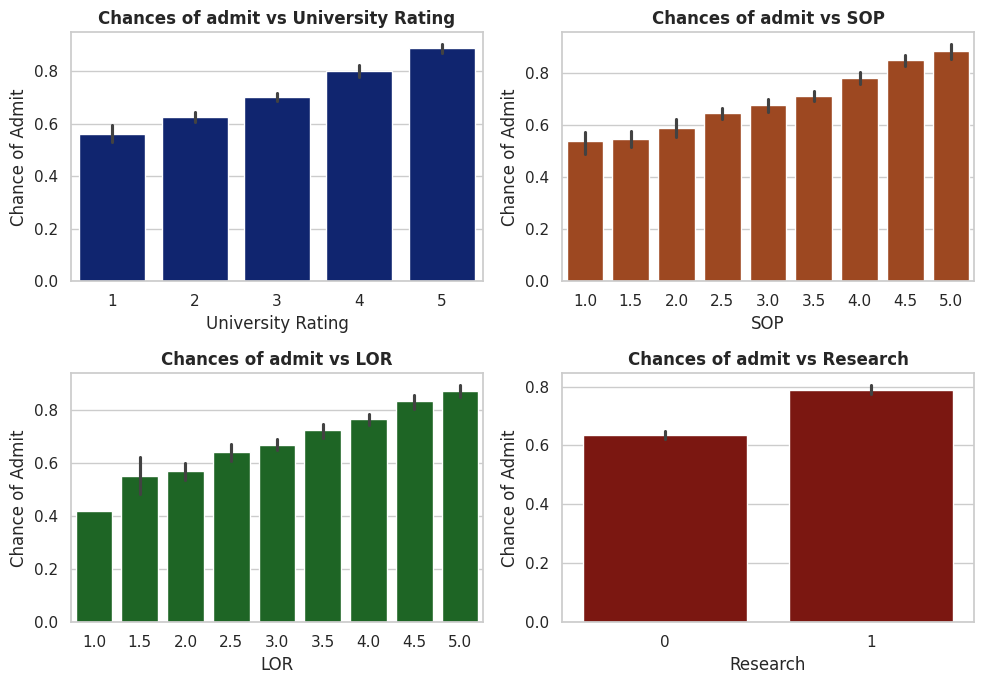

In [ ]:
col=['University Rating','SOP','LOR','Research']
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,7))
axes=axes.flatten()
for i,j in enumerate(col):
  sns.barplot(data=df,x=j,y='Chance of Admit',ax=axes[i],color= palette[i])
  axes[i].set_title(f"Chances of admit vs {j}",fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

###Observstion
 -  Higher University rating indicates higher chance of admit
 - A strong SOP and LOP influence the chance of admitting positively
 - Graph indicates that people who have Reaserch experience have higher chance of admitting.

#Multi Varient Analysis

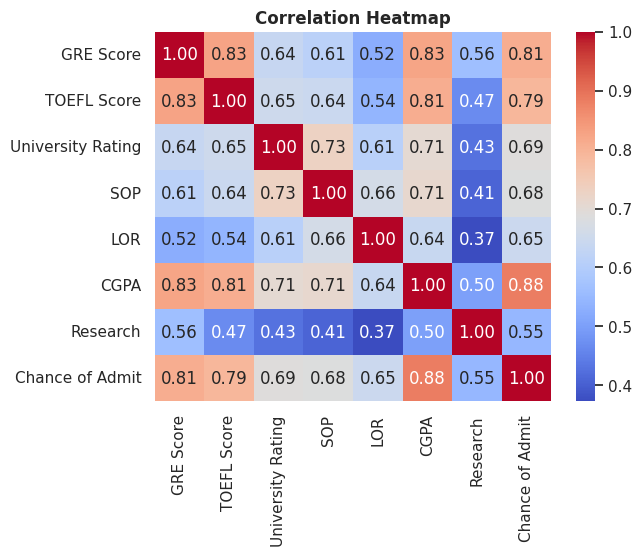

In [ ]:
numerical_data = df.select_dtypes(include='number')

correlation_matrix = numerical_data.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

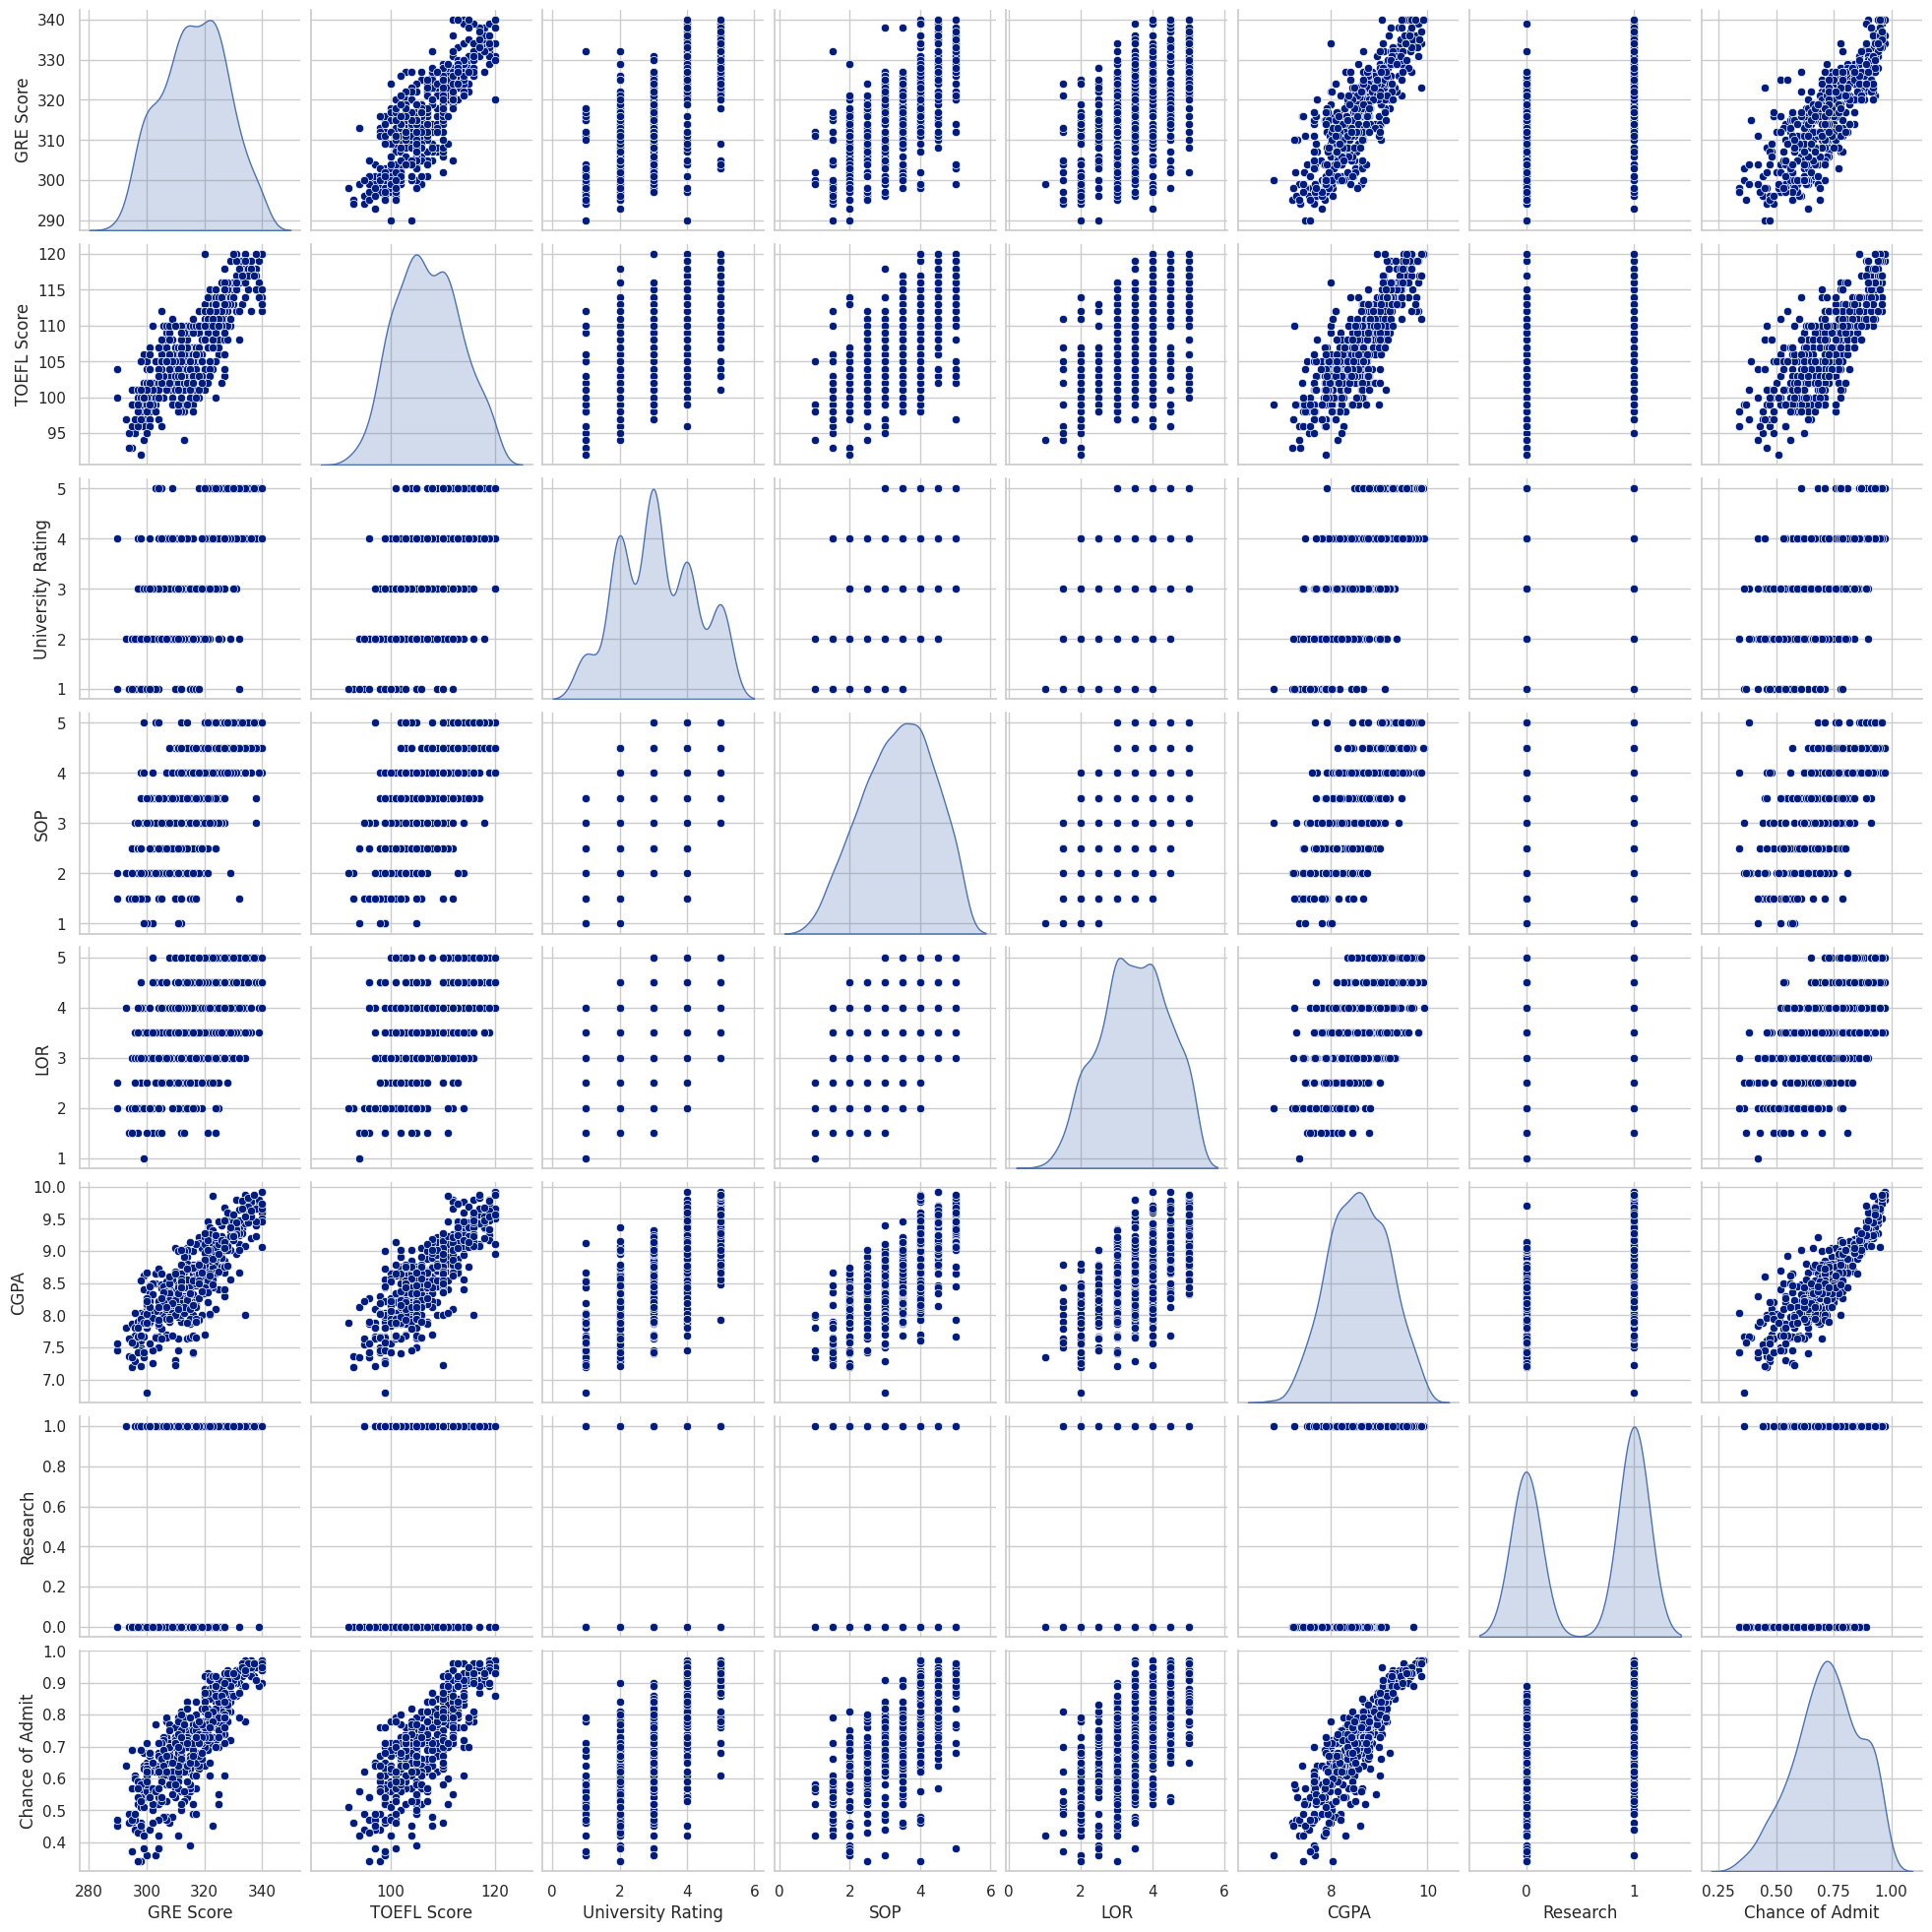

In [ ]:
palette = sns.color_palette("dark")

sns.pairplot(data=df, diag_kind='kde', plot_kws={'color': palette[0]})  # Example: using one color
plt.show()

### Observation
 - A strong correlation (0.88) suggests that a **higher CGPA** is a **strong predictor of a higher chance of admission**. This is expected, as CGPA reflects a student's overall academic performance.
 - A high correlation (0.83) suggests that students with **strong GRE scores** tend to also have **strong TOEFL scores**. This is likely due to the overlap in skills tested by both exams, such as reading comprehension, vocabulary, and grammar.
 - A strong correlation (0.79) suggests that a **higher TOEFL score** is associated with a **higher chance of admission**. This is likely because strong language proficiency is crucial for academic success in an English-speaking environment.
 - A moderate correlation (0.69) suggests that applying to higher-ranked universities is associated with a higher chance of admission, but other factors also play a role
 -  A moderate correlation (0.65) suggests that strong Letters of Recommendation (LORs) can increase the chances of admission.


#Applying Linear Regression

## Data Preparation

In [ ]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23,shuffle= True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Normalizing the Features

scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns,index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns,index=x_test.index)


##Model Building

In [ ]:

#Applying the Linear regression

model=LinearRegression()
model.fit(x_train_scaled,y_train)

#Checking the Model coeffcients
model_coef=model.coef_
print(f"Model coefficients :{model_coef}")



Model coefficients :[0.07245301 0.07558095 0.02998528 0.00868913 0.04929152 0.39522309
 0.01979903]


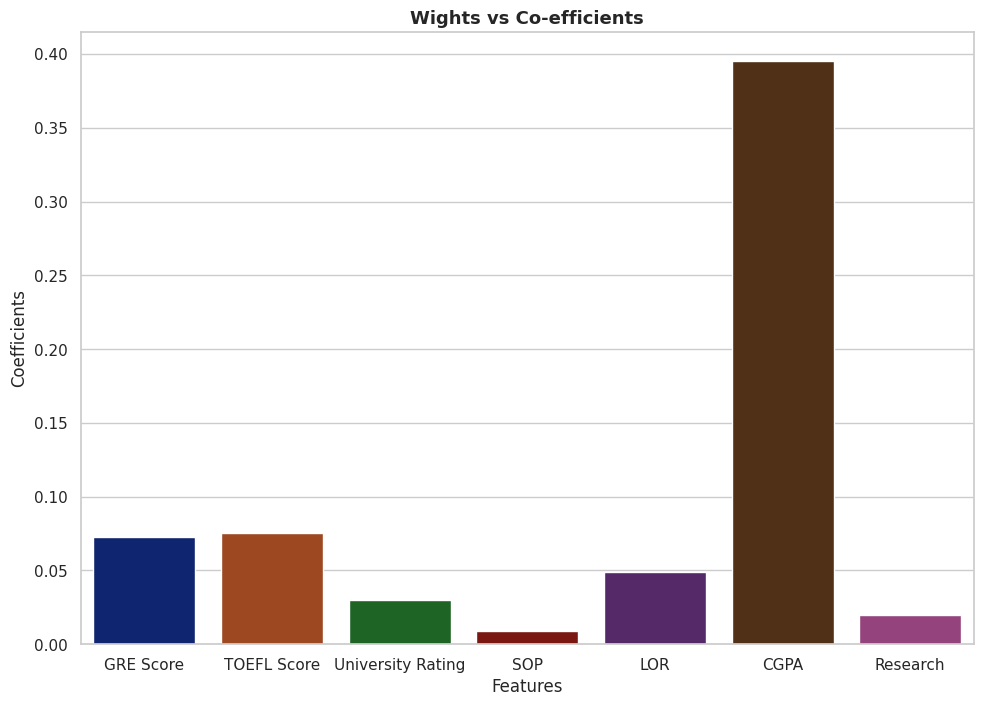

In [ ]:
column_names=df.columns[:-1]

coef_df=pd.DataFrame({'Features':column_names,'Coefficients':model_coef})
plt.figure(figsize=(10,7))
sns.barplot(data=coef_df,x='Features', y='Coefficients',palette=palette)
plt.figsize=(12,4)
plt.tight_layout()
plt.title('Wights vs Co-efficients',fontsize=13,fontweight='bold')
plt.show()

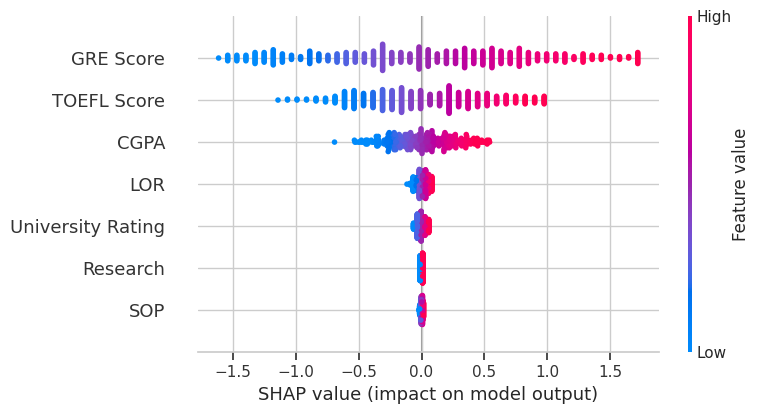

In [ ]:
import shap

explainer = shap.Explainer(model.predict,x_train)
shap_values = explainer(x_train)

# Plot feature importance
shap.summary_plot(shap_values, x_train)

### **Insights**
-  Features like **GRE Score, TOEFL Score and CGPA** has the **highest impact** on model prediction comparing to other features.
-  CGPA has a strong global effect (high coefficient), but its values do not vary as much as GRE Score or TOEFL Score across the training data. As a result, despite having the highest weightage, it ranks 3rd in feature importance based on SHAP values.
- In contrast, SOP and Research values are tightly clustered around 0, showing they barely affect the output.

**Note**
- Coefficients represent the average effect of a one-unit change in a feature on the target variable, assuming all other features are held constant.
- SHAP calculates the marginal contribution of a feature across every data point, accounting for interactions with other features.

## Evaluating the Model

Mean Absolute error :0.04324467034782415
Mean squared error : 0.0036777858543910525
r2_score:0.8045968668566101


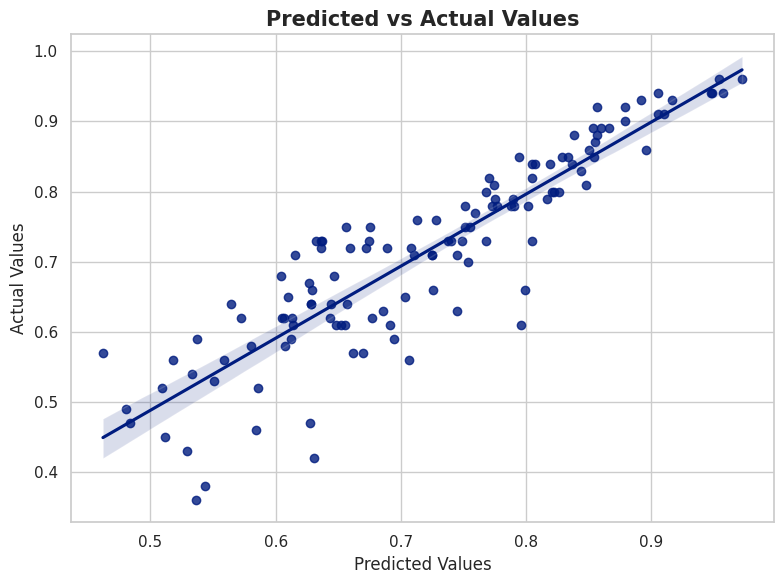

In [ ]:
#Evluating The model
y_pred=model.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute error :{mae}" )
print(f"Mean squared error : {mse}")
print(f"r2_score:{r2}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_pred, y=y_test, color=palette[0])
plt.title("Predicted vs Actual Values",fontweight='bold',fontsize=15)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.tight_layout()
plt.show()


### **Observations**
 - We achieved an R² score of 0.80, which is a good indication that our model performs well. This means the model explains 80% of the variance in the target variable based on the given features.
 - The strong positive correlation and the clustering of data points around the regression line indicate that the model is able to capture the underlying relationship between the variables

#Linear Regression using stats models

In [ ]:
#Adding constant
x_train_const= sm.add_constant(x_train_scaled)
x_test_const=sm.add_constant(x_test_scaled)

ols_model=sm.OLS(y_train,x_train_const).fit()
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     248.5
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          4.93e-135
Time:                        13:06:12   Log-Likelihood:                 527.00
No. Observations:                 375   AIC:                            -1038.
Df Residuals:                     367   BIC:                            -1007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3590      0.01

In [ ]:
x_train_new=x_train.drop( columns=['University Rating','SOP'])
x_train_const_new= sm.add_constant(x_train_new)

model_1=sm.OLS(y_train,x_train_const_new).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.11e-136
Time:                        13:06:12   Log-Likelihood:                 524.90
No. Observations:                 375   AIC:                            -1038.
Df Residuals:                     369   BIC:                            -1014.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3233      0.113    -11.716      

In [ ]:
# y_train_pred = model_1.predict(x_train_const)

y_test_pred = ols_model.predict(x_test_const)
#Calculate metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared: {r2:.3f}")


Mean Squared Error (MSE): 0.004
Mean Absolute Error (MAE): 0.043
R-squared: 0.805


### **Observations**
- Based on SHAP values, there was an assumption that some features might be irrelevant to the model's performance.
- To validate this assumption, Linear Regression was applied using the stats library, and the OLS summary report was analyzed.
- Initially, the R² score of the model was 0.826.
- Through the OLS summary report, it was observed that University rating and SOP had minimal individual impact on the model.
- Based on this observation, these features were removed, assuming they were unimportant.
- After refitting the model with the reduced feature set, the R² score decrease to 0.824
- This suggests that while these features seemed insignificant individually, they may have contributed valuable information when combined with other predictors.
- Dropping these features likely removed key interactions or useful signals, leading to a decline in model performance.

# Assumptions of Linear Regreesion

### Normality of residuals

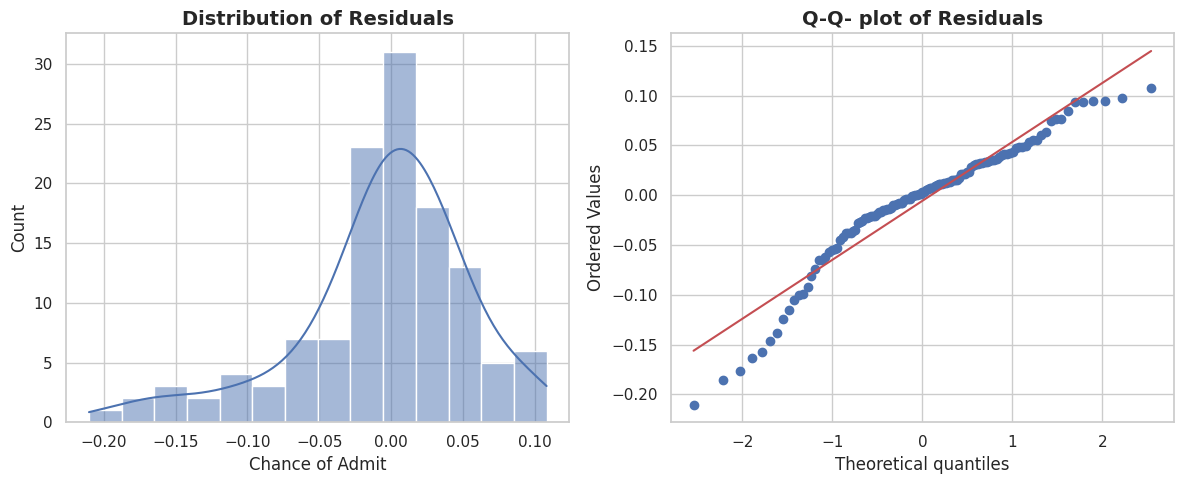

In [ ]:

Residuals= y_test-y_pred
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
Residuals= y_test-y_pred
sns.histplot(Residuals,kde=True,ax=axes[0])
stats.probplot(Residuals,dist='norm',plot=axes[1])
axes[0].set_title('Distribution of Residuals',fontweight='bold',fontsize=14)
axes[1].set_title('Q-Q- plot of Residuals',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()

### No mutlicolinearity(Using VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif = pd.DataFrame()
  vif["features"] = dataset.columns
  vif["VIF_value"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
  return vif
calculate_vif(x_train_const,[])

,features,VIF_value
0,const,12.196725
1,GRE Score,4.573582
2,TOEFL Score,4.064362
3,University Rating,2.987701
4,SOP,3.032863
5,LOR,1.935136
6,CGPA,4.595030
7,Research,1.522257


###No Hetroskedasticity

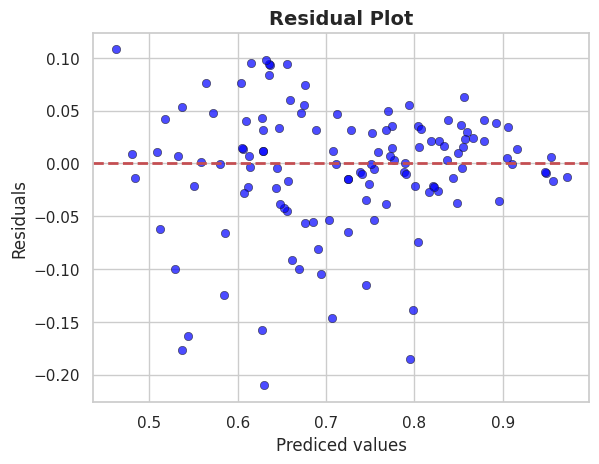

In [ ]:
sns.scatterplot(x=y_pred,y=Residuals, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot',fontweight='bold',fontsize=14)
plt.xlabel('Prediced values')
plt.ylabel('Residuals')
plt.show()

### **Observations**
**Assumptions Check and Validation:**

 - After fitting the linear regression model, it appears that all the key assumptions for linear regression are satisfied:

  - **Linearity**: The relationship between the independent and dependent variables appears to be linear, as suggested by a heatmap showing strong correlations

  - **No Multicollinearity**: There is no significant multicollinearity among the independent variables. Variance Inflation Factor (VIF) values were below the critical threshold (typically below 5 or 10), ensuring that the features are not highly correlated with each other.

  - **Normality of Residuals**: The residuals (errors) follow a normal distribution. This was verified through graphical methods like Q-Q plots or histograms of residuals.
  - **No Heteroscedasticity**: The variance of residuals is constant across all levels of the independent variables. This was checked using residual plots, which showed no patterns (i.e., a "random scatter" of residuals), suggesting homoscedasticity.

Since these assumptions are met, we can confidently conclude that the linear regression model is appropriate for this data and should provide reliable estimates for prediction.

#Linear regression using Ridge, Lasso


In [ ]:


# Initialize Ridge regression model with an alpha (regularization strength)
ridge_model = Ridge(alpha=1.0).fit(x_train_scaled,y_train)
lasso_model= Lasso(alpha=1.0).fit(x_train_scaled, y_train)

y_pred_ridge=ridge_model.predict(x_test_scaled)
y_pred_lasso=lasso_model.predict(x_test_scaled)

# Evaluate the model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
lasso_r2=r2_score(y_test,y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f"Ridge Regression - R²: {ridge_r2:.3f}")
print(f"Ridge Regression - RMSE: {ridge_rmse:.3f}")
print('-----------------------------------------------------------------')

print(f"Lasso Regression - R²: {lasso_r2:.3f}")
print(f"Lasso Regression - RMSE: {lasso_rmse:.3f}")

Ridge Regression - R²: 0.808
Ridge Regression - RMSE: 0.060
-----------------------------------------------------------------
Lasso Regression - R²: -0.004
Lasso Regression - RMSE: 0.137


###HyperParameter Tuning

Ridge Best Alpha: 0.2682695795279725
Lasso Best Alpha: 0.00023299518105153718
Ridge R2 Score: 0.8064351048289703
Lasso R2 Score: 0.8040832352533799


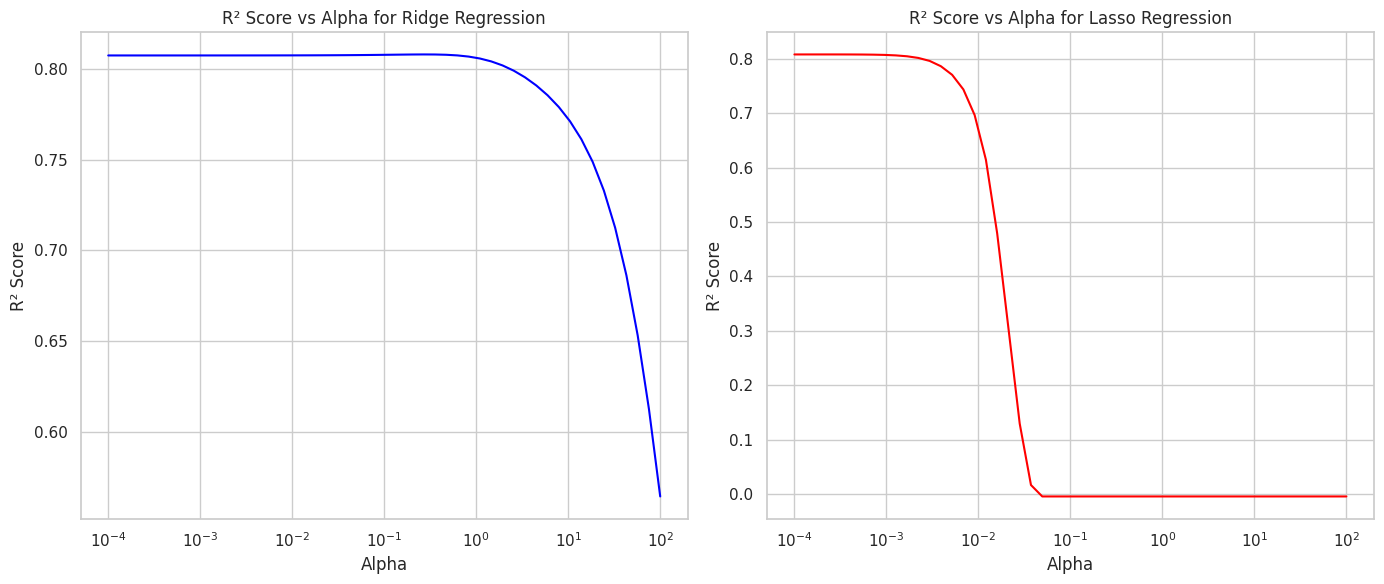

In [ ]:
alpha_values = np.logspace(-4, 2, 50)

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, {'alpha': alpha_values}, scoring='r2', cv=5)
ridge_cv.fit(x_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(max_iter=5000)
lasso_cv = GridSearchCV(lasso, {'alpha': alpha_values}, scoring='r2', cv=5)
lasso_cv.fit(x_train_scaled, y_train)

# Best models
ridge_best = ridge_cv.best_estimator_
lasso_best = lasso_cv.best_estimator_

# Predictions
ridge_preds = ridge_best.predict(x_test_scaled)
lasso_preds = lasso_best.predict(x_test_scaled)

# Evaluation
print("Ridge Best Alpha:", ridge_cv.best_params_['alpha'])
print("Lasso Best Alpha:", lasso_cv.best_params_['alpha'])
print("Ridge R2 Score:", r2_score(y_test, ridge_preds))
print("Lasso R2 Score:", r2_score(y_test, lasso_preds))
# Visualizing alpha vs R² Score for Ridge
plt.figure(figsize=(14, 6))

# Plot for Ridge Regression
plt.subplot(1, 2, 1)
plt.plot(alpha_values, ridge_cv.cv_results_['mean_test_score'], label='R² Score', color='blue')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Ridge Regression')
plt.grid(True)

# Plot for Lasso Regression
plt.subplot(1, 2, 2)
plt.plot(alpha_values, lasso_cv.cv_results_['mean_test_score'], label='R² Score', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Lasso Regression')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

### **Observations**
 - The baseline model shows a 2% difference between the R² score for the training and testing datasets (Train R² = 0.82 | Test R² = 0.80), indicating slight overfitting.
 - To address the slight overfitting observed in the baseline model, Ridge and Lasso regression were applied. Initially, the model was fit using random alpha values; however, this resulted in a drop in the R² score. .
 - So, hyperparameter tuning was employed to identify the optimal alpha values for both methods.
 Ridge Regression:
 -**Ridge regression**
  - Best Alpha: 0.27
  
  - R² Score: 0.8064

- **Lasso Regression**

 - Best Alpha: 0.00023
 - R² Score: 0.8041

**Conclusion**
 - Since Ridge and Lasso yield similar R² scores, the dataset seems well-conditioned without extreme multicollinearity or a large number of irrelevant features.

- The consistency of the R² score across all models suggests that the model is robust.

# Overall Insights

- The dataset contains **only numerical columns** with **no duplicates** or **null values**.  

- **56% of students** have research experience, indicating it is a common factor when applying to universities.  

- Most numerical features (**GRE Score, TOEFL Score, CGPA, SOP, LOR, and Chance of Admit**) follow a **normal distribution**.  

- **High Positive Correlation** exists between features like **GRE Score, TOEFL Score, and CGPA** with the **Chance of Admit** (higher scores lead to higher chances of admission).  

- Other features, such as **University Rating, SOP, and LOR**, show **moderate or low correlation** individually but contribute meaningfully when combined with other predictors.  

- The **baseline linear regression model** performed well with an R² score:  
   - **Train R²** = 0.82 | **Test R²** = 0.80 → Indicates **slight overfitting** (2% difference).  

- Key assumptions of **linear regression** (linearity, homoscedasticity, and normality of residuals) appear to be satisfied.  

- To address overfitting:  
   - **Ridge Regression** and **Lasso Regression** were applied:  
     - **Ridge R²** = 0.8064 | **Lasso R²** = 0.8041  
     - Ridge slightly outperformed Lasso.  

- Both regularization methods produced similar R² scores, indicating:  
   - The dataset is **well-conditioned** with no extreme multicollinearity or redundant features.  
   - **Key features** like GRE Score, TOEFL Score, and CGPA have the **highest impact** on predictions.  

- The consistency of results across models suggests that the **model is robust** and generalizes well to new data.  





# Recommendations  

- **Prioritize GRE, TOEFL Scores, and CGPA**:  
  These are the **key features** that strongly influence the chances of admission. Students should focus on achieving higher scores in these areas.  

- **Encourage Research Participation**:  
  Data shows that **56% of students** have research experience. While it may not appear as a significant factor in this dataset, it could become crucial in future trends. Encourage students to participate in research projects to strengthen their profiles.  

- **Improve SOP, LOR, and University Ratings**:  
  Although these features show **low to moderate correlation** individually, they contribute significantly when combined with other predictors. Students should focus on improving the **quality of SOP and LOR** to complement strong academic scores.  

- **Academic Support Programs**:  
  Design targeted programs to help students enhance their **academic performance** in GRE, TOEFL, and CGPA, and provide structured opportunities for **research participation**.  

- **Admission Committee Guidelines**:  
  Committees can prioritize **GRE, TOEFL, and CGPA** as primary evaluation metrics while considering **SOP and LOR** as complementary factors to make more informed decisions.  

- **Resource Allocation**:  
  Allocate additional resources to support critical areas such as **GRE/TOEFL preparation** and **research opportunities** to help students excel and improve their admission prospects.  
